In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use('science')

In [2]:
import sys
import os
# Get the parent directory
parent_folder = os.path.dirname(os.getcwd())
# add the parent directory to the Python path so that the scripts can be imported
sys.path.append(parent_folder)

In [3]:
from modules.data_preprocessing import data_preprocessor

In [4]:
ams_preprocessor = data_preprocessor()

# Load data

In [5]:
# read the installed capacity from the excel file,sheet 2
# keep only the columns of "Code" and "kWp installed of PV system"
fname_ams = '../data/nl/Households in Amsterdam PV and demand data.xlsx'
ams_preprocessor.df_installed_capacity_csv = pd.read_excel(
    fname_ams, sheet_name=2)[['Code', 'kWp installed of PV system']]

In [6]:
fname_ams_pv = '../data/nl/ams_data_pv_merged.csv'
ams_preprocessor.pv_data = pd.read_csv(fname_ams_pv, parse_dates=['datetime'])
fname_ams_net = '../data/nl/ams_data_net_merged.csv'
ams_preprocessor.net_data = pd.read_csv(
    fname_ams_net, parse_dates=['datetime'])
fname_ams_con = '../data/nl/ams_data_con_merged.csv'
ams_preprocessor.con_data = pd.read_csv(fname_ams_con)
fname_ams_data = '../data/nl/ams_data_merged_unprocessed.csv'
ams_preprocessor.ams_data = pd.read_csv(
    fname_ams_data, parse_dates=['datetime'])

In [7]:
ams_preprocessor.ams_data.describe()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,...,7099P_net,7426U_net,7679U_net,7710F_net,7743P_net,8319Q_net,9248C_net,9370J_net,9506H_net,9991J_net
count,16960,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,...,4145.000000,8238.000000,16107.000000,15061.000000,878.000000,8799.000000,8695.000000,16903.000000,10583.000000,7267.000000
mean,2018-03-21 21:19:57.169811456,11.501887,2.999410,186.337087,6.638620,2017.709788,4.849941,11.537730,126.359080,0.085938,...,675.625235,327.608194,-29.931086,400.657380,1167.023690,-43.662189,81.023715,-94.868077,58.953369,135.842136
min,2017-04-02 11:00:00,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,-8.600000,0.000000,0.000000,...,-1222.700000,-784.000000,-2774.200000,-1366.700000,-35.500000,-2422.900000,-834.200000,-2366.100000,0.000000,-6064.300000
25%,2017-09-26 02:45:00,5.750000,1.000000,100.000000,4.000000,2017.000000,3.000000,6.500000,0.000000,0.000000,...,506.100000,181.125000,6.200000,102.000000,202.925000,-128.550000,16.300000,-216.150000,0.000000,-379.800000
50%,2018-03-21 22:30:00,12.000000,3.000000,189.000000,7.000000,2018.000000,4.000000,11.400000,5.555556,0.000000,...,632.700000,294.900000,137.000000,264.900000,486.450000,113.500000,103.300000,81.800000,0.000000,250.900000
75%,2018-09-14 14:15:00,18.000000,5.000000,277.000000,10.000000,2018.000000,6.000000,16.600000,183.333333,0.000000,...,884.400000,442.800000,240.750000,691.700000,983.350000,284.750000,157.800000,163.700000,0.200000,960.250000
max,2019-03-10 06:00:00,23.000000,6.000000,365.000000,12.000000,2019.000000,23.000000,35.200000,925.000000,16.800000,...,3364.400000,4095.800000,3586.400000,4321.000000,11836.000000,2615.300000,2267.200000,2749.300000,2187.600000,6996.200000
std,NaN,6.923146,1.999852,105.394955,3.445191,0.631895,2.645396,6.733416,203.727075,0.485234,...,547.556878,419.493489,623.621917,592.583187,2247.549514,679.917357,286.346048,603.740732,225.070040,1761.623306


# Data Clearning

Drop the outliers.
1. drop the columns of 9506H, because there is no solar panels.
2. drop the columns of 4226R, because there is weird data in 2019 March.
3. drop the column of 7743P, for the high missing rate of 0.948231.
4. drop the column of 7099P because none of its data is in summer and high missing rate 75.56%.
5. drop the columns of 3307S and 2108P, because they seem to have some demand response strategies.

In [8]:
# drop the outliers for pv data
ams_preprocessor.drop_outliers()

# Scaleing and Transform

## Normalization of PV Gen by installed capacity

First, check the capacity provided in the csv file.

In [9]:
# print df_installed_capacity, These are the capacities provided in the csv file.
print("The capacities provided in the csv file are:")
ams_preprocessor.df_installed_capacity_csv

The capacities provided in the csv file are:


,Code,kWp installed of PV system
0,9370J,3.360
1,8319Q,NaN
2,7679U,4.000
3,5815T,4.050
4,3517V,1.350
5,7743P,1.100
6,1954W,4.000
7,7710F,2.880
8,3070L,0.000
9,4226R,3.850


It's found that the capacities of 8139Q,3070L,9248C are missing.

### Estimate the PV capacity from PV profiles

In [10]:
ams_preprocessor.pv_data = ams_preprocessor.drop_outliers_no_suffix(
    df=ams_preprocessor.pv_data)

In [11]:
ams_preprocessor.estimate_pv_capacity_from_pv_profiles_avg_high_values()

In [12]:
# save df_pv_capacity to a csv file, as well as the index
ams_preprocessor.pv_capacity_from_pv_profiles.to_csv(
    '../data/nl/ams_pv_capacity_from_pv_profiles.csv', index=True)

### Normalization of PV gen

Normalize the PV generation of each household by the its' maximum PV generation.

In [13]:
ams_preprocessor.normalize_pv()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,...,4451M_net,5427W_net,5815T_net,7426U_net,7679U_net,7710F_net,8319Q_net,9248C_net,9370J_net,9991J_net
0,2017-04-02 11:00:00,11,6,92,4,2017,5.0,15.7,700.000000,0.0000,...,NaN,NaN,-1868.0,NaN,-2045.8,NaN,NaN,NaN,-1240.7,NaN
1,2017-04-02 12:00:00,12,6,92,4,2017,5.0,15.3,675.000000,0.0000,...,NaN,NaN,-1830.0,NaN,-2101.8,NaN,NaN,NaN,-1220.9,NaN
2,2017-04-02 13:00:00,13,6,92,4,2017,5.0,14.9,600.000000,0.0000,...,NaN,NaN,-1151.5,NaN,-1493.1,NaN,NaN,NaN,-818.0,NaN
3,2017-04-02 14:00:00,14,6,92,4,2017,5.0,14.2,516.666667,0.0000,...,NaN,NaN,-1260.2,NaN,-1615.7,NaN,NaN,NaN,-967.6,NaN
4,2017-04-02 15:00:00,15,6,92,4,2017,5.0,13.3,372.222222,0.0000,...,NaN,NaN,-1085.2,NaN,-1240.8,NaN,NaN,NaN,-860.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955,2019-03-10 02:00:00,2,6,69,3,2019,3.0,7.2,0.000000,0.0025,...,2334.9,66.7,NaN,338.7,249.9,133.9,123.6,94.9,88.5,292.7
16956,2019-03-10 03:00:00,3,6,69,3,2019,4.0,5.9,0.000000,0.0025,...,1309.9,63.0,NaN,315.1,289.8,132.8,85.8,96.0,81.4,488.6
16957,2019-03-10 04:00:00,4,6,69,3,2019,2.0,5.6,0.000000,1.1000,...,405.4,69.1,NaN,392.9,239.4,150.0,104.2,117.9,81.1,681.9
16958,2019-03-10 05:00:00,5,6,69,3,2019,4.0,5.1,0.000000,1.0000,...,2237.7,74.4,NaN,380.9,268.8,355.7,124.6,60.7,93.0,274.1


In [14]:
ams_preprocessor.ams_data_pv_normalized.describe()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,...,4451M_net,5427W_net,5815T_net,7426U_net,7679U_net,7710F_net,8319Q_net,9248C_net,9370J_net,9991J_net
count,16960,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,...,7162.000000,9502.000000,16528.000000,8238.000000,16107.000000,15061.000000,8799.000000,8695.000000,16903.000000,7267.000000
mean,2018-03-21 21:19:57.169811456,11.501887,2.999410,186.337087,6.638620,2017.709788,4.849941,11.537730,126.359080,0.085938,...,139.025942,-54.076205,-32.402807,327.608194,-29.931086,400.657380,-43.662189,81.023715,-94.868077,135.842136
min,2017-04-02 11:00:00,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,-8.600000,0.000000,0.000000,...,-4754.700000,-1261.600000,-2990.800000,-784.000000,-2774.200000,-1366.700000,-2422.900000,-834.200000,-2366.100000,-6064.300000
25%,2017-09-26 02:45:00,5.750000,1.000000,100.000000,4.000000,2017.000000,3.000000,6.500000,0.000000,0.000000,...,-259.100000,-142.875000,-134.975000,181.125000,6.200000,102.000000,-128.550000,16.300000,-216.150000,-379.800000
50%,2018-03-21 22:30:00,12.000000,3.000000,189.000000,7.000000,2018.000000,4.000000,11.400000,5.555556,0.000000,...,262.900000,50.800000,205.050000,294.900000,137.000000,264.900000,113.500000,103.300000,81.800000,250.900000
75%,2018-09-14 14:15:00,18.000000,5.000000,277.000000,10.000000,2018.000000,6.000000,16.600000,183.333333,0.000000,...,868.075000,86.900000,332.300000,442.800000,240.750000,691.700000,284.750000,157.800000,163.700000,960.250000
max,2019-03-10 06:00:00,23.000000,6.000000,365.000000,12.000000,2019.000000,23.000000,35.200000,925.000000,16.800000,...,5230.700000,1616.300000,2245.400000,4095.800000,3586.400000,4321.000000,2615.300000,2267.200000,2749.300000,6996.200000
std,NaN,6.923146,1.999852,105.394955,3.445191,0.631895,2.645396,6.733416,203.727075,0.485234,...,1436.339700,339.779201,714.924679,419.493489,623.621917,592.583187,679.917357,286.346048,603.740732,1761.623306


In [15]:
from modules.data_exploration import data_explorer
ams_explorer = data_explorer(
    ams_preprocessor.ams_data_pv_normalized, ams_preprocessor.con_data)

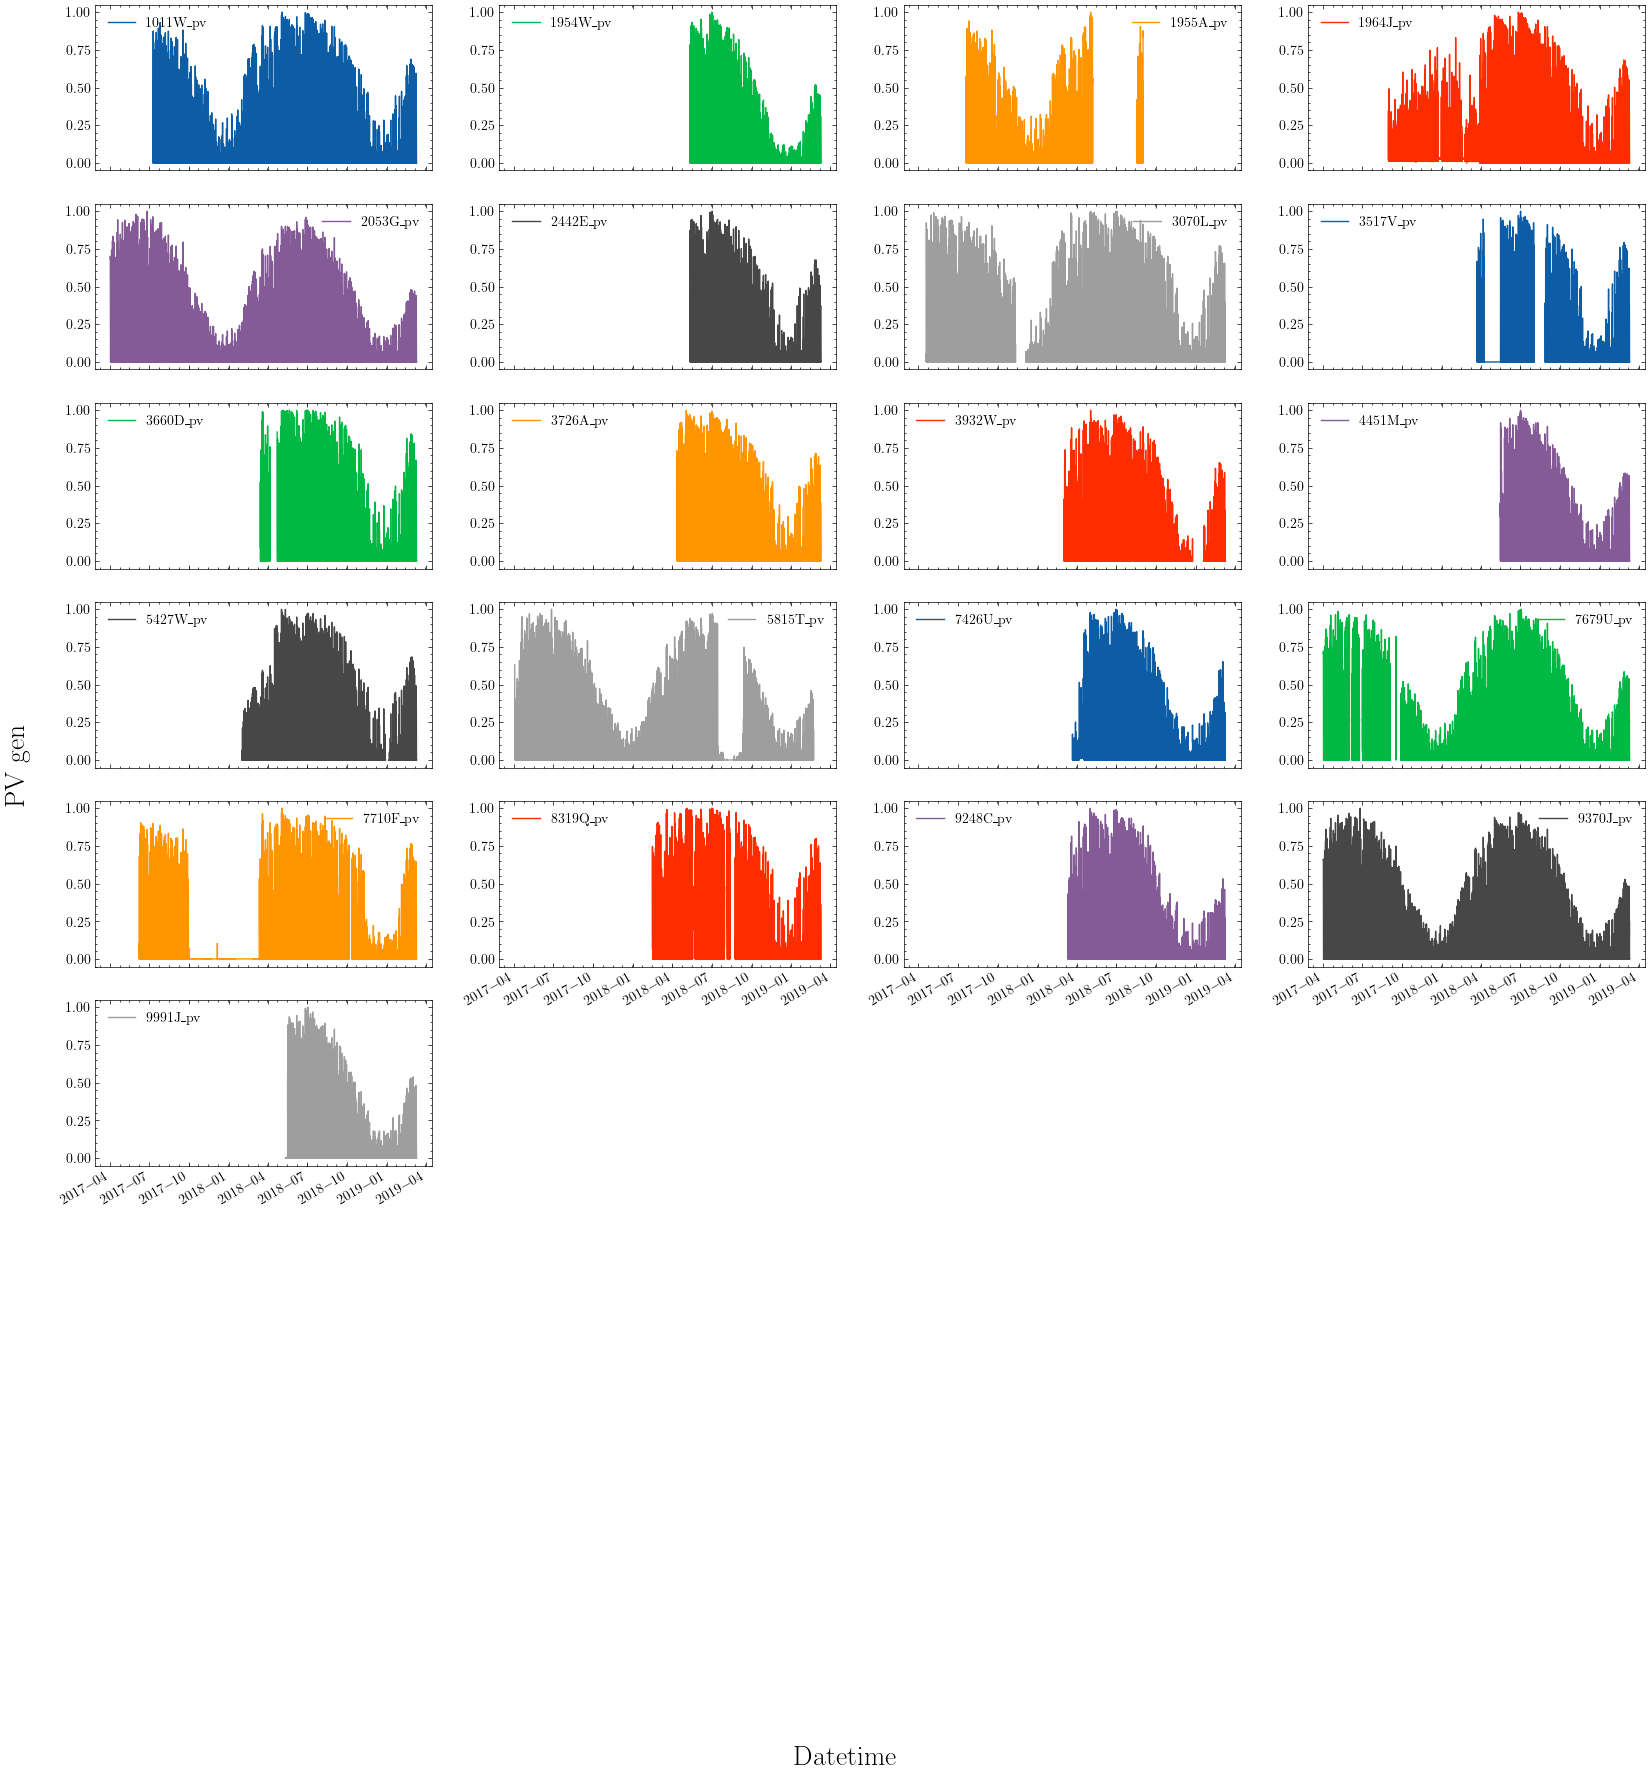

In [16]:
pv_columns = [
    col for col in ams_preprocessor.ams_data_pv_normalized.columns if col.endswith('_pv')]
# plot the pv_normalized data
ams_explorer.df_common_xylabel_plot(
    df=ams_preprocessor.ams_data_pv_normalized, y=pv_columns, ylabel='PV gen')

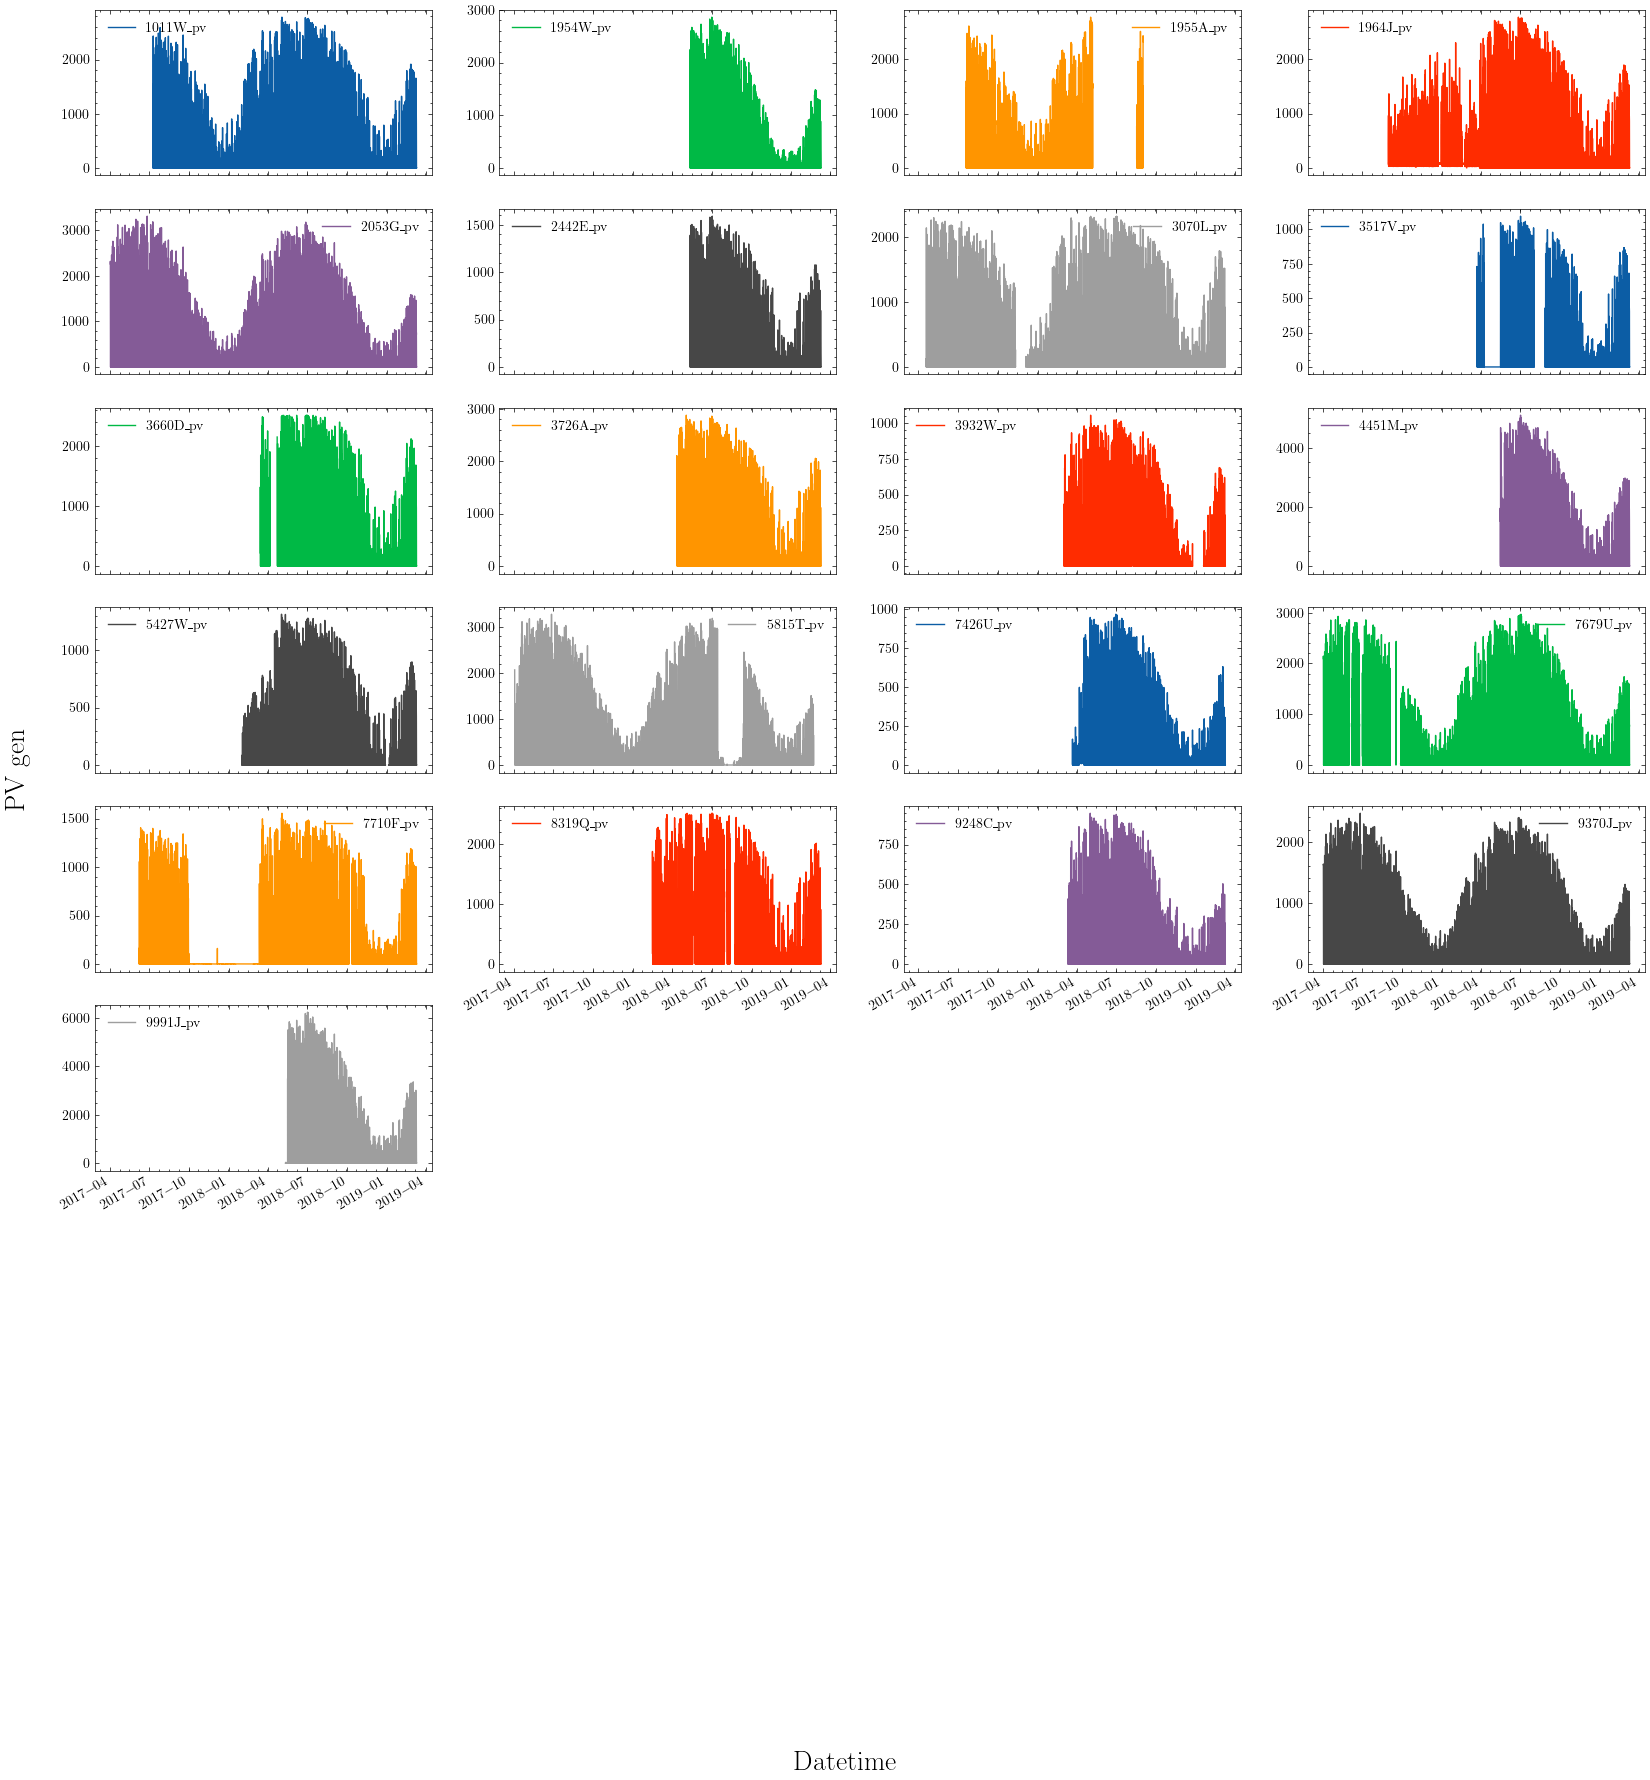

In [17]:
# plot the pv data without normalization
ams_explorer.df_common_xylabel_plot(
    df=ams_preprocessor.ams_data, y=pv_columns, ylabel='PV gen')

## Add total net and con

In [18]:
ams_preprocessor.add_total_net()
ams_preprocessor.add_total_con()

['1011W_con', '1954W_con', '1955A_con', '1964J_con', '2053G_con', '2442E_con', '3070L_con', '3517V_con', '3660D_con', '3726A_con', '3932W_con', '4451M_con', '5427W_con', '5815T_con', '7426U_con', '7679U_con', '7710F_con', '8319Q_con', '9248C_con', '9370J_con', '9991J_con']


## Add total PV gen

In [19]:
ams_preprocessor.add_total_pv_gen()

['1011W_pv', '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv', '3517V_pv', '3660D_pv', '3726A_pv', '3932W_pv', '4451M_pv', '5427W_pv', '5815T_pv', '7426U_pv', '7679U_pv', '7710F_pv', '8319Q_pv', '9248C_pv', '9370J_pv', '9991J_pv']


In [20]:
ams_preprocessor.ams_data['total_net'].describe()

count    16960.000000
mean       887.499723
std       8442.109923
min     -43386.700000
25%       -710.400000
50%       2142.650000
75%       5187.150000
max      24279.100000
Name: total_net, dtype: float64

In [21]:
ams_preprocessor.add_total_pv_gen_normalized(
    capacity=ams_preprocessor.pv_capacity_from_pv_profiles)

In [22]:
ams_preprocessor.ams_data_pv_normalized.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm', 'Timestamp', '1011W_pv',
       '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv',
       '3517V_pv', '3660D_pv', '3726A_pv', '3932W_pv', '4451M_pv', '5427W_pv',
       '5815T_pv', '7426U_pv', '7679U_pv', '7710F_pv', '8319Q_pv', '9248C_pv',
       '9370J_pv', '9991J_pv', '1011W_con', '1954W_con', '1955A_con',
       '1964J_con', '2053G_con', '2442E_con', '3070L_con', '3517V_con',
       '3660D_con', '3726A_con', '3932W_con', '4451M_con', '5427W_con',
       '5815T_con', '7426U_con', '7679U_con', '7710F_con', '8319Q_con',
       '9248C_con', '9370J_con', '9991J_con', '1011W_net', '1954W_net',
       '1955A_net', '1964J_net', '2053G_net', '2442E_net', '3070L_net',
       '3517V_net', '3660D_net', '3726A_net', '3932W_ne

<Axes: xlabel='datetime'>

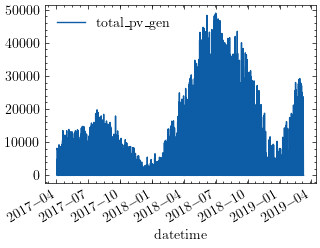

In [23]:
# plot 'total_pv_gen'  against datetime
ams_preprocessor.ams_data_pv_normalized.plot(x='datetime', y='total_pv_gen')

<Axes: xlabel='datetime'>

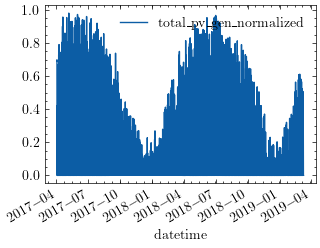

In [24]:
# plot 'total_pv_gen_normalized'  against datetime
ams_preprocessor.ams_data_pv_normalized.plot(
    x='datetime', y='total_pv_gen_normalized')

<Axes: xlabel='datetime'>

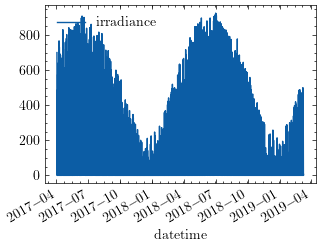

In [25]:
# plot the irradiance data
ams_preprocessor.ams_data_pv_normalized.plot(x='datetime', y='irradiance')

<Axes: xlabel='datetime'>

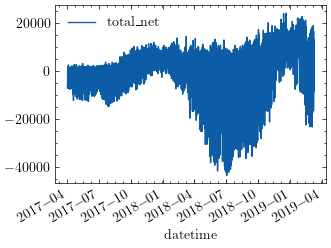

In [26]:
# plot total_net
ams_preprocessor.ams_data_pv_normalized.plot(x='datetime', y='total_net')

<Axes: xlabel='datetime'>

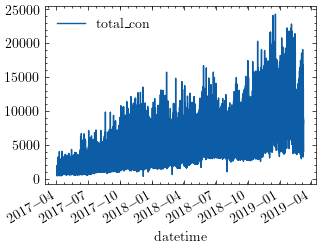

In [27]:
# plot total_con
ams_preprocessor.ams_data_pv_normalized.plot(x='datetime', y='total_con')

# Feature Engineering

## Cosine and Sineof HoD

In [28]:
ams_preprocessor.add_cos_sin_HoD()

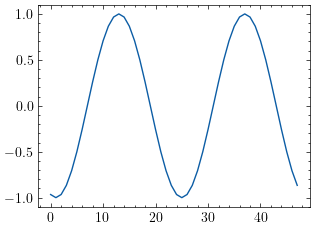

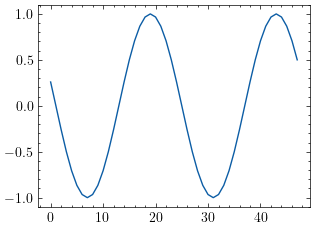

In [29]:
# plot the cos_HoD for the first 2 days
plt.plot(ams_preprocessor.ams_data_pv_normalized['cos_HoD'].iloc[:2*24])
plt.show()
# plot the sin_HoD for the first 2 days
plt.plot(ams_preprocessor.ams_data_pv_normalized['sin_HoD'].iloc[:2*24])
plt.show()

## Solar Position Features

In [30]:
# Solar Position Features
ams_preprocessor.add_solar_position_features()

In [31]:
ams_preprocessor.ams_data_pv_normalized['zenith'].describe()

count    16960.000000
mean        89.634772
std         29.909297
min         29.063331
25%         68.075756
50%         89.245500
75%        111.256594
max        150.854431
Name: zenith, dtype: float64

In [32]:
ams_preprocessor.ams_data_pv_normalized['azimuth'].describe()

count    16960.000000
mean       177.379066
std        102.214198
min          1.915871
25%         87.292681
50%        181.309662
75%        268.453565
max        350.828780
Name: azimuth, dtype: float64

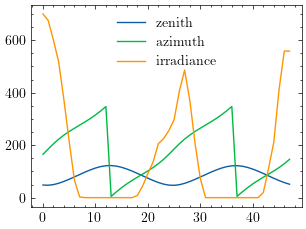

In [ ]:
# plot the zenith and azimuth for the first 2 days,on the same plot
plt.plot(
    ams_preprocessor.ams_data_pv_normalized['zenith'].iloc[:2*24], label='zenith')
plt.plot(
    ams_preprocessor.ams_data_pv_normalized['azimuth'].iloc[:2*24], label='azimuth')
plt.plot(
    ams_preprocessor.ams_data_pv_normalized['irradiance'].iloc[:2*24], label='irradiance')
plt.legend()
plt.show()

In [34]:
# normalize the zenith and azimuth
ams_preprocessor.normalize_feature(feature_list=['zenith', 'azimuth'])

In [35]:
# describe the column temperature_norm
ams_preprocessor.ams_data_pv_normalized['temperature_norm'].describe()

count    16960.000000
mean         0.459766
std          0.153731
min          0.000000
25%          0.344749
50%          0.456621
75%          0.575342
max          1.000000
Name: temperature_norm, dtype: float64

In [36]:
# normalize total_net
ams_preprocessor.normalize_feature(feature_list=['total_net'])

In [37]:
# describe the column total_net_norm
ams_preprocessor.ams_data_pv_normalized['total_net_norm'].describe()

count    16960.000000
mean         0.654307
std          0.124762
min          0.000000
25%          0.630692
50%          0.672856
75%          0.717849
max          1.000000
Name: total_net_norm, dtype: float64

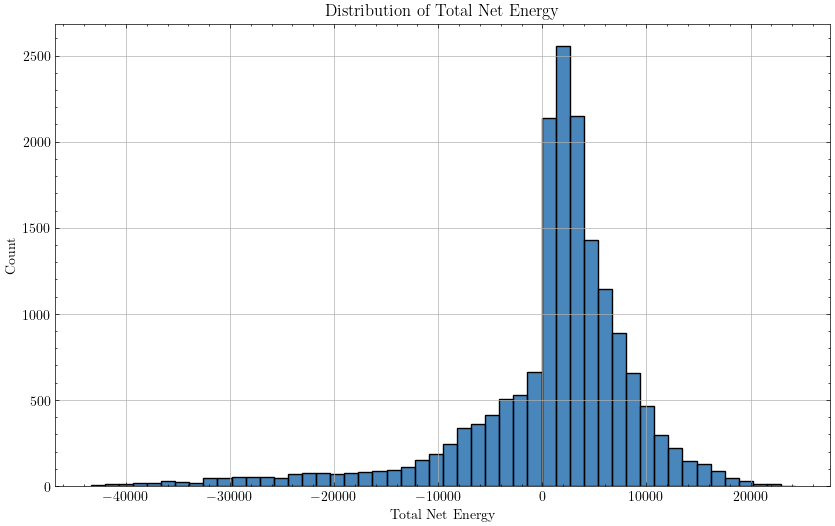

In [38]:
# plot the histgram of total_net
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized,
             x='total_net', bins=50)
plt.title('Distribution of Total Net Energy')
plt.xlabel('Total Net Energy')
plt.ylabel('Count')
plt.grid(True)
plt.show()

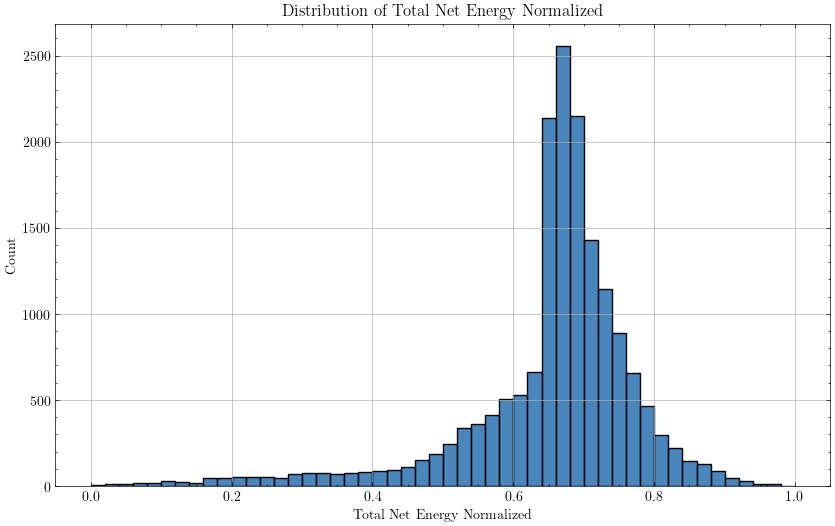

In [ ]:
# plot the histgram of total_net_norm
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized,
             x='total_net_norm', bins=50)
plt.title('Distribution of Total Net Energy Normalized')
plt.xlabel('Total Net Energy Normalized')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [40]:
ams_preprocessor.ams_data_pv_normalized['irradiance_norm'].describe()

count    16960.000000
mean         0.126359
std          0.203727
min          0.000000
25%          0.000000
50%          0.005556
75%          0.183333
max          0.925000
Name: irradiance_norm, dtype: float64

# Save the preprocessed data

In [41]:
ams_preprocessor.ams_data_pv_normalized.shape

(16960, 91)

In [42]:
ams_preprocessor.ams_data.shape

(16960, 83)

In [43]:
ams_preprocessor.ams_data_pv_normalized.to_csv(
    '../data/nl/ams_data_merged_preprocessed.csv', index=False)

# Seperate the data into sets of households

In [44]:
# columns that end with _pv in ams_data
pv_cols = [
    col for col in ams_preprocessor.ams_data.columns if col.endswith('_pv')]
print(pv_cols)
print(f'number of pv columns: {len(pv_cols)}')

['1011W_pv', '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv', '3517V_pv', '3660D_pv', '3726A_pv', '3932W_pv', '4451M_pv', '5427W_pv', '5815T_pv', '7426U_pv', '7679U_pv', '7710F_pv', '8319Q_pv', '9248C_pv', '9370J_pv', '9991J_pv']
number of pv columns: 21


In [45]:
# columns that end with _net in ams_data, except 'total_net'
net_cols = [col for col in ams_preprocessor.ams_data.columns if col.endswith(
    '_net') and col != 'total_net']
print(net_cols)
print(f'number of net columns: {len(net_cols)}')

['1011W_net', '1954W_net', '1955A_net', '1964J_net', '2053G_net', '2442E_net', '3070L_net', '3517V_net', '3660D_net', '3726A_net', '3932W_net', '4451M_net', '5427W_net', '5815T_net', '7426U_net', '7679U_net', '7710F_net', '8319Q_net', '9248C_net', '9370J_net', '9991J_net']
number of net columns: 21


In [ ]:
# columns that end with _con in ams_data, except 'total_con'
con_cols = [col for col in ams_preprocessor.ams_data.columns if col.endswith(
    '_con') and col != 'total_con']
print(con_cols)
print(f'number of con columns: {len(con_cols)}')

['1011W_con', '1954W_con', '1955A_con', '1964J_con', '2053G_con', '2442E_con', '3070L_con', '3517V_con', '3660D_con', '3726A_con', '3932W_con', '4451M_con', '5427W_con', '5815T_con', '7426U_con', '7679U_con', '7710F_con', '8319Q_con', '9248C_con', '9370J_con', '9991J_con']
number of con columns: 21


In [47]:
# get the first 10 pv columns
pv_cols_10 = pv_cols[:10]
# the rest of the pv columns
pv_cols_rest = pv_cols[10:]
# get the first 10 net columns
net_cols_10 = net_cols[:10]
# the rest of the net columns
net_cols_rest = net_cols[10:]
# get the first 10 con columns
con_cols_10 = con_cols[:10]
# the rest of the con columns
con_cols_rest = con_cols[10:]
# get the first 10 pv columns
pv_cols_10 = pv_cols[:10]

In [48]:
# remove the _pv suffix from pv_cols_10
cols_10 = [col.replace('_pv', '') for col in pv_cols_10]
# remove the _pv suffix from pv_cols_rest
cols_rest = [col.replace('_pv', '') for col in pv_cols_rest]

In [49]:
# remove the rest pv, con, and net columns from ams_data and save it as ams_data_part1
ams_preprocessor.ams_data_part1 = ams_preprocessor.ams_data.drop(
    columns=pv_cols_rest+con_cols_rest+net_cols_rest)
# remove the first 10 pv, con, and net columns from ams_data and save it as ams_data_part2
ams_preprocessor.ams_data_part2 = ams_preprocessor.ams_data.drop(
    columns=pv_cols_10+con_cols_10+net_cols_10)

In [50]:
# shape of ams_data_part1 and ams_data_part2
print(ams_preprocessor.ams_data_part1.shape)
print(ams_preprocessor.ams_data_part2.shape)

(16960, 50)
(16960, 53)


## Preprocessing of these two datasets

In [51]:
ams_preprocessor_part1 = data_preprocessor()
ams_preprocessor_part2 = data_preprocessor()
ams_preprocessor_part1.ams_data = ams_preprocessor.ams_data_part1
ams_preprocessor_part2.ams_data = ams_preprocessor.ams_data_part2

In [52]:
ams_preprocessor.ams_data_part1.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm', 'Timestamp', '1011W_pv',
       '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv',
       '3517V_pv', '3660D_pv', '3726A_pv', '1011W_con', '1954W_con',
       '1955A_con', '1964J_con', '2053G_con', '2442E_con', '3070L_con',
       '3517V_con', '3660D_con', '3726A_con', '1011W_net', '1954W_net',
       '1955A_net', '1964J_net', '2053G_net', '2442E_net', '3070L_net',
       '3517V_net', '3660D_net', '3726A_net', 'total_net', 'total_con',
       'total_pv_gen'],
      dtype='object')

In [53]:
ams_preprocessor.pv_data.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm', 'Timestamp', '1011W', '1954W',
       '1955A', '1964J', '2053G', '2442E', '3070L', '3517V', '3660D', '3726A',
       '3932W', '4451M', '5427W', '5815T', '7426U', '7679U', '7710F', '8319Q',
       '9248C', '9370J', '9991J'],
      dtype='object')

In [54]:
# drop the columns of cols_rest from pv_data
ams_preprocessor_part1.pv_data = ams_preprocessor.pv_data.drop(
    columns=cols_rest)
# drop the columns of cols_10 from pv_data
ams_preprocessor_part2.pv_data = ams_preprocessor.pv_data.drop(columns=cols_10)

## Normalize PV

In [55]:
ams_preprocessor_part1.estimate_pv_capacity_from_pv_profiles_avg_high_values()
ams_preprocessor_part2.estimate_pv_capacity_from_pv_profiles_avg_high_values()

In [56]:
ams_preprocessor_part1.normalize_pv()
ams_preprocessor_part2.normalize_pv()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,...,7426U_net,7679U_net,7710F_net,8319Q_net,9248C_net,9370J_net,9991J_net,total_net,total_con,total_pv_gen
0,2017-04-02 11:00:00,11,6,92,4,2017,5.0,15.7,700.000000,0.0000,...,NaN,-2045.8,NaN,NaN,NaN,-1240.7,NaN,-6529.9,1526.7,8056.6
1,2017-04-02 12:00:00,12,6,92,4,2017,5.0,15.3,675.000000,0.0000,...,NaN,-2101.8,NaN,NaN,NaN,-1220.9,NaN,-7110.8,1046.8,8157.6
2,2017-04-02 13:00:00,13,6,92,4,2017,5.0,14.9,600.000000,0.0000,...,NaN,-1493.1,NaN,NaN,NaN,-818.0,NaN,-4817.2,777.4,5594.6
3,2017-04-02 14:00:00,14,6,92,4,2017,5.0,14.2,516.666667,0.0000,...,NaN,-1615.7,NaN,NaN,NaN,-967.6,NaN,-5294.4,782.5,6076.9
4,2017-04-02 15:00:00,15,6,92,4,2017,5.0,13.3,372.222222,0.0000,...,NaN,-1240.8,NaN,NaN,NaN,-860.1,NaN,-4395.3,502.6,4897.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955,2019-03-10 02:00:00,2,6,69,3,2019,3.0,7.2,0.000000,0.0025,...,338.7,249.9,133.9,123.6,94.9,88.5,292.7,5308.1,5308.1,0.0
16956,2019-03-10 03:00:00,3,6,69,3,2019,4.0,5.9,0.000000,0.0025,...,315.1,289.8,132.8,85.8,96.0,81.4,488.6,4492.9,4492.9,0.0
16957,2019-03-10 04:00:00,4,6,69,3,2019,2.0,5.6,0.000000,1.1000,...,392.9,239.4,150.0,104.2,117.9,81.1,681.9,3891.4,3891.4,0.0
16958,2019-03-10 05:00:00,5,6,69,3,2019,4.0,5.1,0.000000,1.0000,...,380.9,268.8,355.7,124.6,60.7,93.0,274.1,5541.4,5541.4,0.0


## Add total net, con and pv gen


In [57]:
ams_preprocessor_part1.add_total_net()
ams_preprocessor_part1.add_total_con()
ams_preprocessor_part1.add_total_pv_gen()
ams_preprocessor_part2.add_total_net()
ams_preprocessor_part2.add_total_con()
ams_preprocessor_part2.add_total_pv_gen()

['1011W_con', '1954W_con', '1955A_con', '1964J_con', '2053G_con', '2442E_con', '3070L_con', '3517V_con', '3660D_con', '3726A_con', 'total_con']
['1011W_pv', '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv', '3517V_pv', '3660D_pv', '3726A_pv']
['3932W_con', '4451M_con', '5427W_con', '5815T_con', '7426U_con', '7679U_con', '7710F_con', '8319Q_con', '9248C_con', '9370J_con', '9991J_con', 'total_con']
['3932W_pv', '4451M_pv', '5427W_pv', '5815T_pv', '7426U_pv', '7679U_pv', '7710F_pv', '8319Q_pv', '9248C_pv', '9370J_pv', '9991J_pv']


## feature engineering

In [58]:
ams_preprocessor_part1.add_cos_sin_HoD()
ams_preprocessor_part2.add_cos_sin_HoD()
# Solar Position Features
ams_preprocessor_part1.add_solar_position_features()
ams_preprocessor_part2.add_solar_position_features()
# Normalization
ams_preprocessor_part1.normalize_feature(
    feature_list=['total_net', 'total_pv_gen'])
ams_preprocessor_part2.normalize_feature(
    feature_list=['total_net', 'total_pv_gen'])

In [59]:
ams_preprocessor_part1.ams_data.columns
ams_preprocessor_part2.ams_data.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm', 'Timestamp', '3932W_pv',
       '4451M_pv', '5427W_pv', '5815T_pv', '7426U_pv', '7679U_pv', '7710F_pv',
       '8319Q_pv', '9248C_pv', '9370J_pv', '9991J_pv', '3932W_con',
       '4451M_con', '5427W_con', '5815T_con', '7426U_con', '7679U_con',
       '7710F_con', '8319Q_con', '9248C_con', '9370J_con', '9991J_con',
       '3932W_net', '4451M_net', '5427W_net', '5815T_net', '7426U_net',
       '7679U_net', '7710F_net', '8319Q_net', '9248C_net', '9370J_net',
       '9991J_net', 'total_net', 'total_con', 'total_pv_gen'],
      dtype='object')

In [60]:
ams_preprocessor_part1.ams_data_pv_normalized.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm', 'Timestamp', '1011W_pv',
       '1954W_pv', '1955A_pv', '1964J_pv', '2053G_pv', '2442E_pv', '3070L_pv',
       '3517V_pv', '3660D_pv', '3726A_pv', '1011W_con', '1954W_con',
       '1955A_con', '1964J_con', '2053G_con', '2442E_con', '3070L_con',
       '3517V_con', '3660D_con', '3726A_con', '1011W_net', '1954W_net',
       '1955A_net', '1964J_net', '2053G_net', '2442E_net', '3070L_net',
       '3517V_net', '3660D_net', '3726A_net', 'total_net', 'total_con',
       'total_pv_gen', 'cos_HoD', 'sin_HoD', 'zenith', 'azimuth',
       'total_net_norm', 'total_pv_gen_norm'],
      dtype='object')

## Check the total_pv_gen_normalized distribution

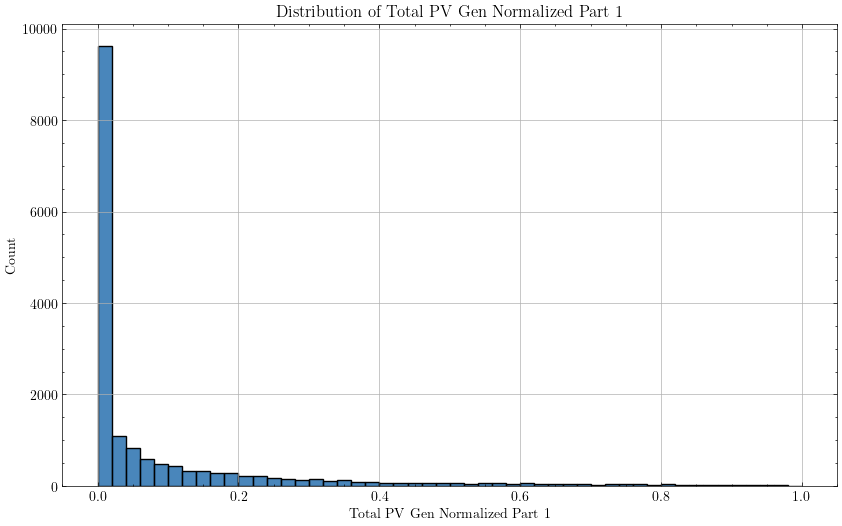

In [61]:
# plot the distribution of total_pv_gen_normalized for part 1
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor_part1.ams_data_pv_normalized,
             x='total_pv_gen_norm', bins=50)
plt.title('Distribution of Total PV Gen Normalized Part 1')
plt.xlabel('Total PV Gen Normalized Part 1')
plt.ylabel('Count')
plt.grid(True)
plt.show()

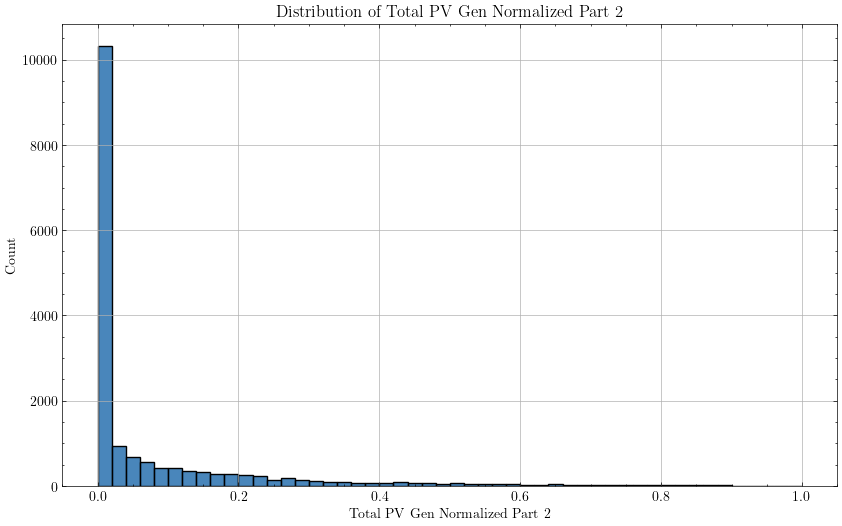

In [ ]:
# plot the distribution of total_pv_gen_normalized for part 2
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor_part2.ams_data_pv_normalized,
             x='total_pv_gen_norm', bins=50)
plt.title('Distribution of Total PV Gen Normalized Part 2')
plt.xlabel('Total PV Gen Normalized Part 2')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [63]:
# describe the total_pv_gen_norm for part 1
ams_preprocessor_part1.ams_data_pv_normalized['total_pv_gen_norm'].describe()

count    16960.000000
mean         0.093964
std          0.174824
min          0.000000
25%          0.000000
50%          0.008064
75%          0.104548
max          1.000000
Name: total_pv_gen_norm, dtype: float64

In [64]:
# describe the total_pv_gen_norm for part 2
ams_preprocessor_part2.ams_data_pv_normalized['total_pv_gen_norm'].describe()

count    16960.000000
mean         0.080766
std          0.156263
min          0.000000
25%          0.000000
50%          0.000621
75%          0.090577
max          1.000000
Name: total_pv_gen_norm, dtype: float64

<Axes: xlabel='datetime'>

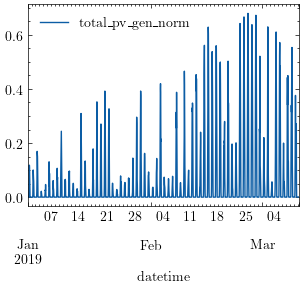

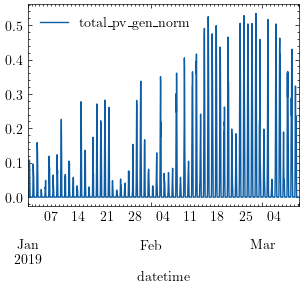

In [65]:
# plot the total_pv_gen_norm for part 1 and part 2, for 2019
ams_preprocessor_part1.ams_data_pv_normalized[ams_preprocessor_part1.ams_data_pv_normalized['datetime'].dt.year == 2019].plot(
    x='datetime', y='total_pv_gen_norm')
ams_preprocessor_part2.ams_data_pv_normalized[ams_preprocessor_part2.ams_data_pv_normalized['datetime'].dt.year == 2019].plot(
    x='datetime', y='total_pv_gen_norm')

In [66]:
# rename the "total_pv_gen_norm" to "total_pv_gen_normalized"
# TODO: somehow, the "total_pv_gen_norm" was not correctly named with "total_pv_gen_normalized"
ams_preprocessor_part1.ams_data_pv_normalized.rename(
    columns={'total_pv_gen_norm': 'total_pv_gen_normalized'}, inplace=True)
ams_preprocessor_part2.ams_data_pv_normalized.rename(
    columns={'total_pv_gen_norm': 'total_pv_gen_normalized'}, inplace=True)

## Save the data

In [67]:
# save the preprocessed data
ams_preprocessor_part1.ams_data_pv_normalized.to_csv(
    '../data/nl/ams_data_merged_preprocessed_part1.csv', index=False)
ams_preprocessor_part2.ams_data_pv_normalized.to_csv(
    '../data/nl/ams_data_merged_preprocessed_part2.csv', index=False)

# Removal of night values

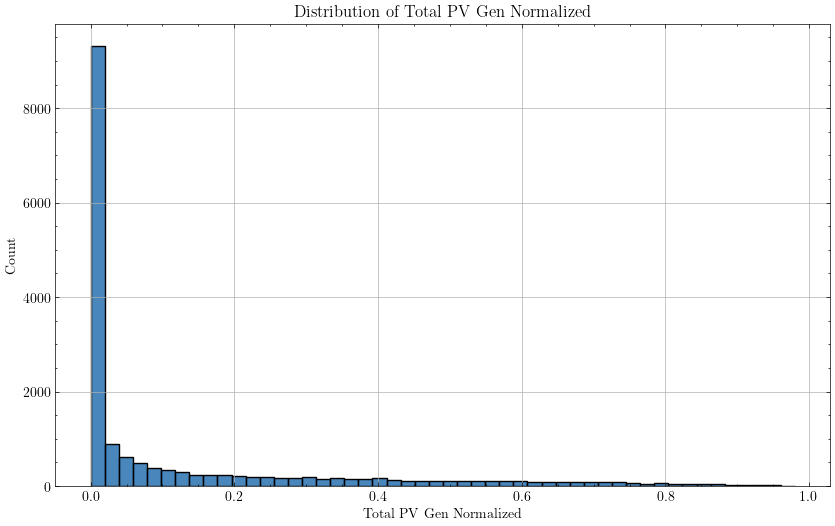

In [68]:
# check the distribution of total_pv_gen_normalized
ams_preprocessor.ams_data_pv_normalized['total_pv_gen_normalized'].describe()
# plot the distribution of total_pv_gen_normalized
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized,
             x='total_pv_gen_normalized', bins=50)
plt.title('Distribution of Total PV Gen Normalized')
plt.xlabel('Total PV Gen Normalized')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Removal by irradiance 

In [69]:
ams_preprocessor.remove_night_values_by_irradiance()

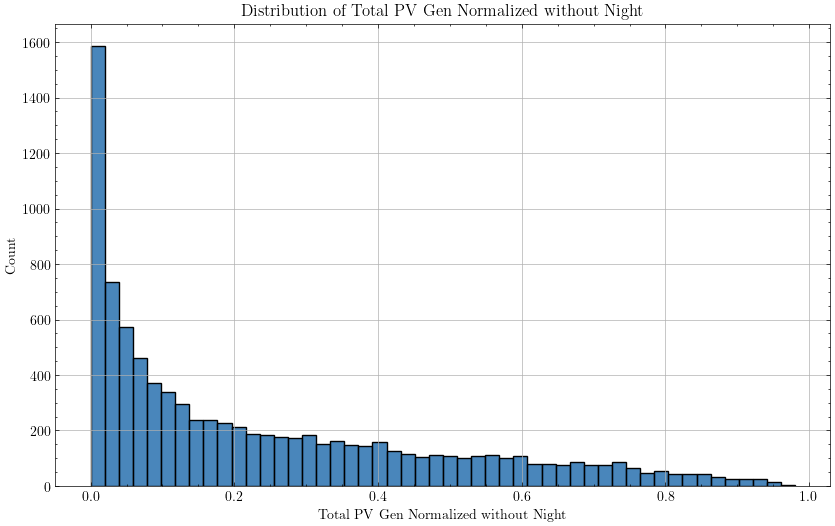

In [70]:
# plot the distribution of total_pv_gen_normalized_without_night
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized_night_removed_by_irradiance,
             x='total_pv_gen_normalized', bins=50)
plt.title('Distribution of Total PV Gen Normalized without Night')
plt.xlabel('Total PV Gen Normalized without Night')
plt.ylabel('Count')
plt.grid(True)
plt.show()

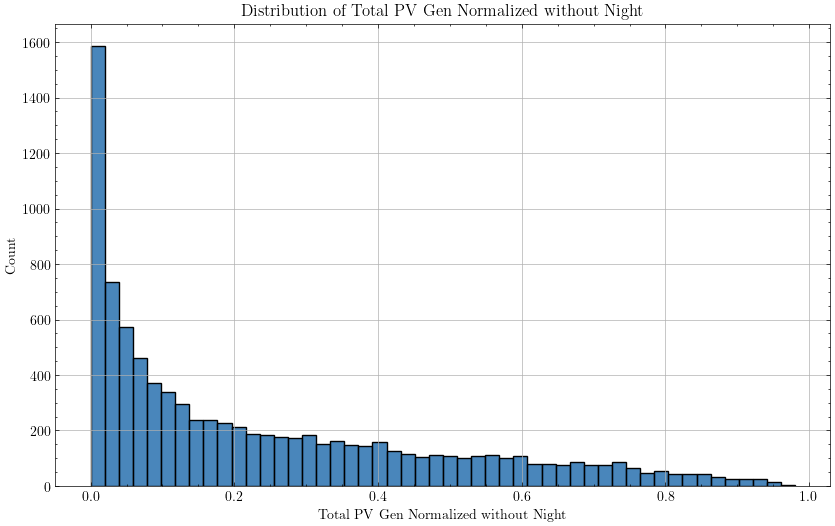

In [71]:
# check the total_pv_gen_normalized distribution in night removed by irradiance
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized_night_removed_by_irradiance,
             x='total_pv_gen_normalized', bins=50)
plt.title('Distribution of Total PV Gen Normalized without Night')
plt.xlabel('Total PV Gen Normalized without Night')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [72]:
ams_preprocessor.ams_data_pv_normalized_night_removed_by_irradiance.to_csv(
    '../data/nl/ams_data_merged_preprocessed_night_removed_by_irradiance.csv', index=False)

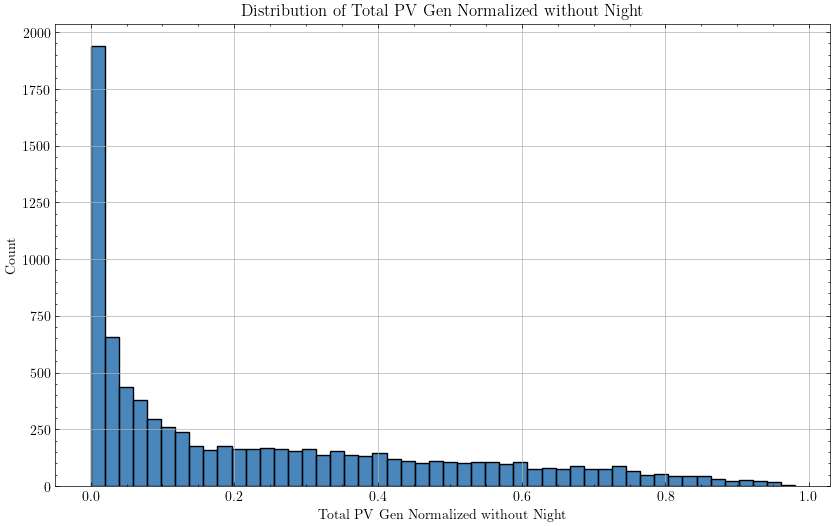

In [73]:
# Removal by azimuth
ams_preprocessor.remove_night_values_by_azimuth()
# plot the distribution of total_pv_gen_normalized_without_night
plt.figure(figsize=(10, 6))
sns.histplot(data=ams_preprocessor.ams_data_pv_normalized_night_removed_by_azimuth,
             x='total_pv_gen_normalized', bins=50)
plt.title('Distribution of Total PV Gen Normalized without Night')
plt.xlabel('Total PV Gen Normalized without Night')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [74]:
ams_preprocessor.ams_data_pv_normalized_night_removed_by_azimuth.to_csv(
    '../data/nl/ams_data_merged_preprocessed_night_removed_by_azimuth.csv', index=False)